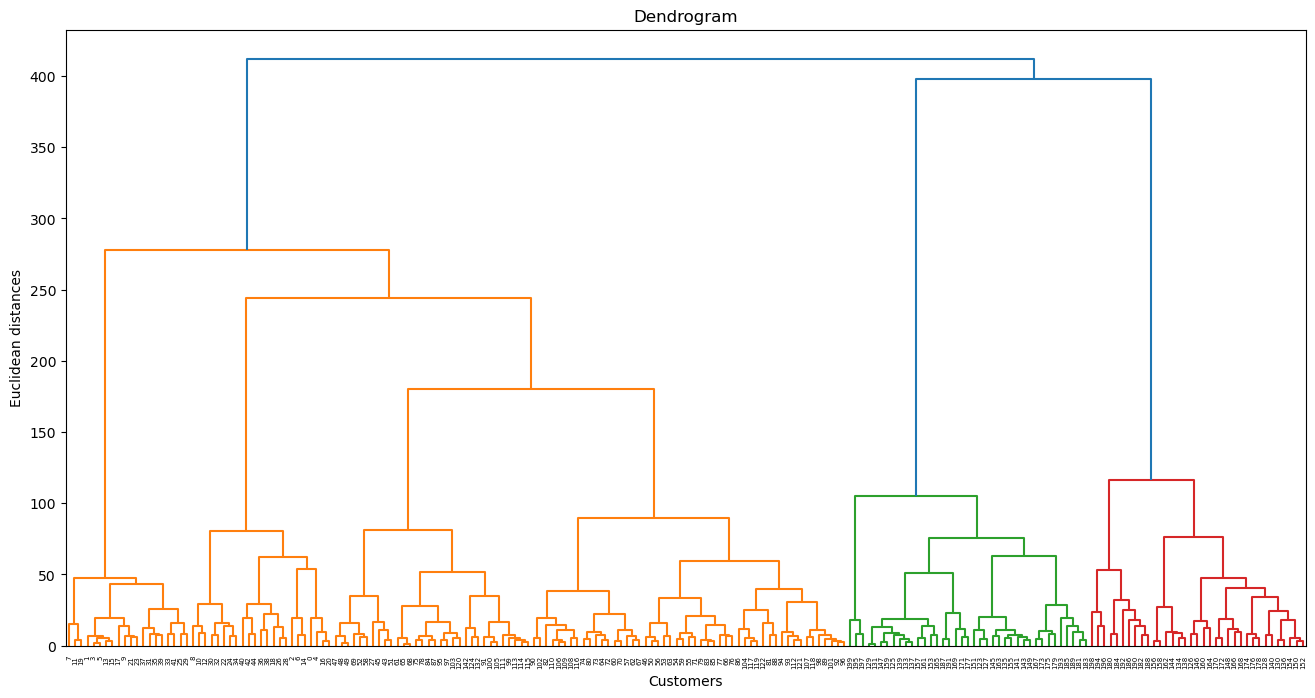

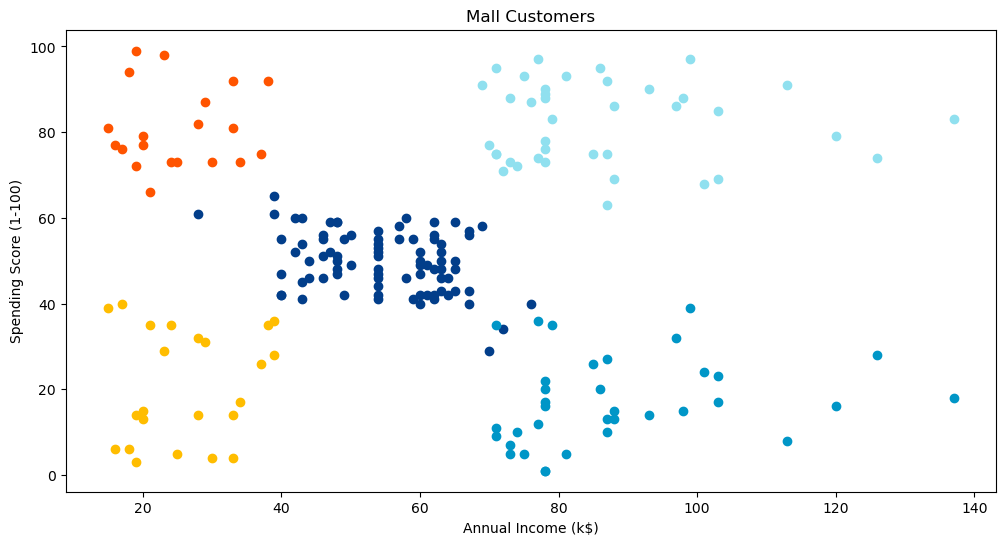

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

 

mall_dataset = pd.read_csv('C:/Users/mohan/Downloads/Mall_Customers.csv')
mall_dataset.head()


##report = sv.analyze(mall_dataset).show_notebook()


label_encoder = preprocessing.LabelEncoder() 

mall_dataset['Genre'] = label_encoder.fit_transform(mall_dataset['Genre'])
mall_dataset.head()

##Let us plot the dendrogram for the mall customers dataset after dropping the “CustomerID” column.
X = mall_dataset.drop(['CustomerID'], axis=1)

plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##Looking at the dendrogram, it is quite clear that the data has 5 or 6 distant clusters. Apply Agglomerative Clustering with 5 as the optimal number of clusters and Euclidean as the distance metric.
## drop CustomerID to get the input data for clustering
X = mall_dataset.drop(['CustomerID'], axis=1)

## Instantiate Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage ='ward')

## Fit and predict the cluster for each data point
mall_dataset["cluster"] = agg_cluster.fit_predict(X)
mall_dataset["cluster"].head()

##Finally, plot the data points with the cluster marking.
fig = plt.figure(figsize=(12,6))

colors = ["#023e8a", "#0096c7","#90e0ef","#ff5400","#ffbd00", '#000000']

for r in range(5):
    clustered_customer = mall_dataset[mall_dataset["cluster"] == r]
    plt.scatter(clustered_customer["Annual Income (k$)"], clustered_customer["Spending Score (1-100)"], color=colors[r])
    
plt.title("Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = mall_dataset.drop(['CustomerID'], axis=1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18
